In [1]:
import os
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss
from scipy.stats import zscore
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams

# Analysis of Batch-corrected Skin-Mammary Data

## Reading relevant input data

In [2]:
path_to_umap_coords = "./../z1_combined_batch_corrected_data/umap_data_combined.txt"
df_umap = pd.read_csv(path_to_umap_coords,sep="\t",index_col=0)

In [3]:
path_to_metadata = "./../z1_combined_batch_corrected_data/meta_data_combined.txt"
df_metadata = pd.read_csv(path_to_metadata,sep="\t",index_col=0)
df_metadata["sample_id"] = [int(i[-1])-2 for i in df_metadata.index]

In [4]:
path_to_batch_corrected_data = "./../z1_combined_batch_corrected_data/top_2000_scaled_data_both_combined.txt"
df_corrected_scores = pd.read_csv(path_to_batch_corrected_data,sep="\t",index_col=0).T

In [5]:
df_concat = pd.concat([df_corrected_scores,df_umap,df_metadata],axis=1)

c:\users\csb_05\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


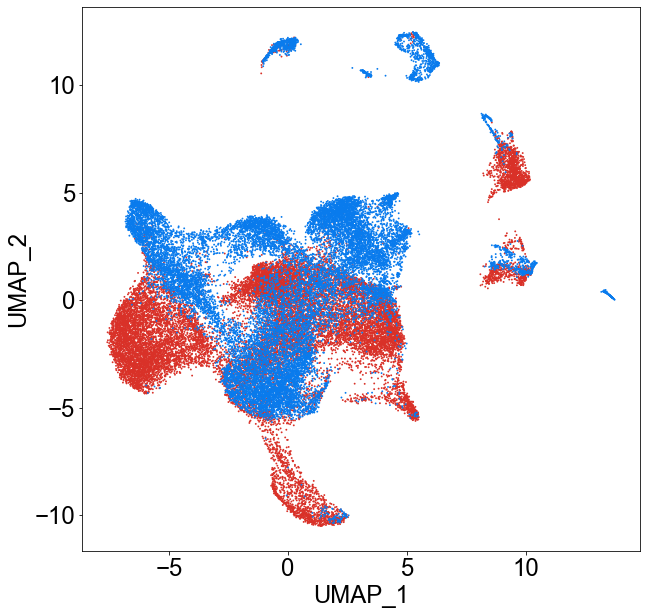

In [32]:
plt.rcParams["font.size"] = 24
plt.rcParams["font.family"] = 'Arial'
plt.rcParams["figure.figsize"] = (10,10)
sns.scatterplot(df_concat["UMAP_1"],df_concat["UMAP_2"],hue=df_concat["biotype"],linewidth=0,s=3.5,palette=['#D93128','#097BED'])
plt.legend('',frameon=False)
plt.savefig("Biotype_comparision_scatter.pdf")

c:\users\csb_05\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


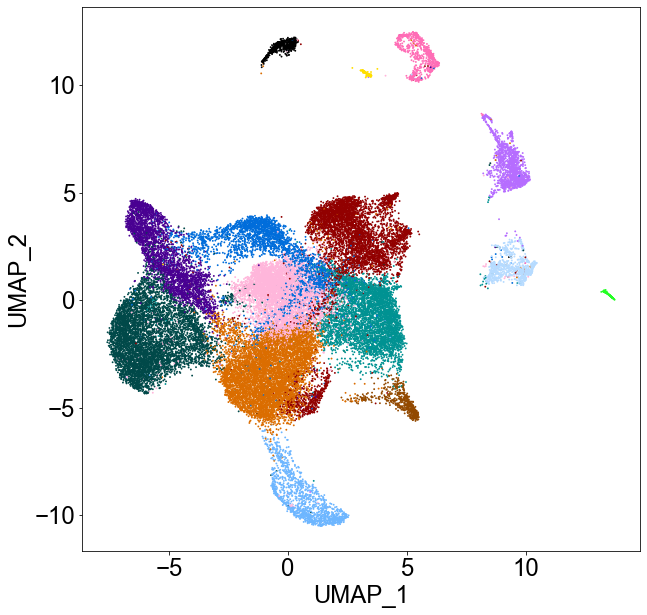

In [112]:
plt.rcParams["font.size"] = 24
plt.rcParams["font.family"] = 'Arial'
plt.rcParams["figure.figsize"] = (10,10)
sns.scatterplot(df_concat["UMAP_1"],df_concat["UMAP_2"],hue=df_concat["integrated_snn_res.0.5"],linewidth=0,s=3.5,palette=["#db6d00","#004949","#ffb6db","#920000","#009292","#490092","#006ddb","#b66dff","#6db6ff","#b6dbff","#ff6db6","#924900","#000000","#24ff24","#ffdf00"])
plt.legend('',frameon=False)
plt.savefig("Seurat_clustering_scatter.png",dpi=1000)

In [22]:
df_concat_mam = df_concat[df_concat["biotype"] == "Mammary2"]

c:\users\csb_05\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


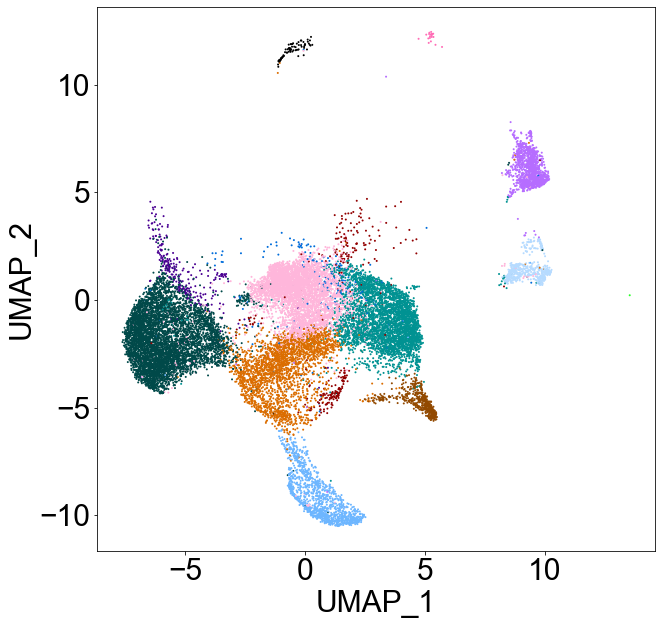

In [25]:
plt.rcParams["font.size"] = 30
plt.rcParams["font.family"] = 'Arial'
plt.rcParams["figure.figsize"] = (10,10)
sns.scatterplot(df_concat_mam["UMAP_1"],df_concat_mam["UMAP_2"],hue=df_concat_mam["integrated_snn_res.0.5"],linewidth=0,s=4,palette=["#db6d00","#004949","#ffb6db","#920000","#009292","#490092","#006ddb","#b66dff","#6db6ff","#b6dbff","#ff6db6","#924900","#000000","#24ff24"])  #,"#ffdf00"
plt.legend('',frameon=False)
plt.savefig("./new_plots/Seurat_clustering_scatter_Mammary_only.png",dpi=1000)
plt.show()

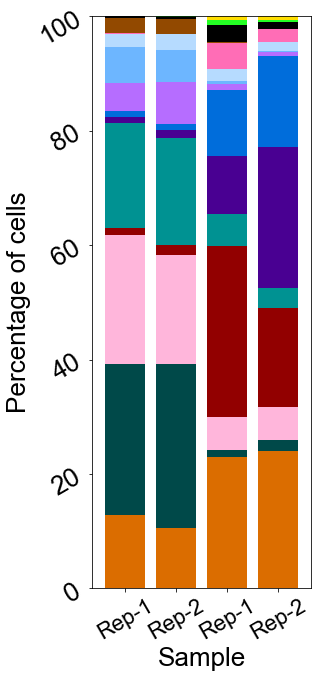

In [15]:
plt.rcParams["font.size"] = 26
plt.rcParams["font.family"] = 'Arial'
plt.rcParams["figure.figsize"] = (5,10)
df = df_metadata.groupby(['sample_id','integrated_snn_res.0.5']).size().transform(lambda x: 100*(x / x.sum(level="sample_id")).round(5))
df.unstack().plot(kind='bar', stacked=True, width=0.8, color =["#db6d00","#004949","#ffb6db","#920000","#009292","#490092","#006ddb","#b66dff","#6db6ff","#b6dbff","#ff6db6","#924900","#000000","#24ff24","#ffdf00"])
plt.ylim([0,100])
plt.legend('',frameon=False)
plt.ylabel("Percentage of cells")
plt.xticks([0,1,2,3],["Rep-1","Rep-2","Rep-1","Rep-2"])
plt.xticks(fontsize=22, rotation=30)
plt.yticks(fontsize=26, rotation=30)
plt.xlabel("Sample")
plt.tight_layout()
plt.savefig("./new_plots/Seurat_clustering_barplot_stacked.pdf",dpi=1000)

In [26]:
d_path = {}
path_to_signature = "./gene_signatures/curated_regulons_31340985_table_S3.gmt"
reference_genes = set(list(df_corrected_scores.columns))
with open(path_to_signature) as f:
    for line in f:
        a = line[:-1].split("\t")
        path_name = a[0]
        genes = a[2:]
        genes = [g.capitalize() for g in genes]
        genes = list(set(genes).intersection(reference_genes))
        if len(genes) > 5:
            d_path[path_name] = genes
        
d_path_scores = {}
for path in d_path:
    subset = df_concat[d_path[path]]
    subset = subset.apply(zscore)
    scores = subset.mean(axis=1)
    d_path_scores[path] = scores

In [27]:
d_path_2 = {}
path_to_signature = "./gene_signatures/signatures.gmt"
reference_genes = set(list(df_corrected_scores.columns))
with open(path_to_signature) as f:
    for line in f:
        a = line[:-1].split("\t")
        path_name = a[0]
        genes = a[2:]
        genes = [g.capitalize() for g in genes]
        genes = list(set(genes).intersection(reference_genes))
        if len(genes) > 5:
            d_path_2[path_name] = genes
        
d_path_scores_2 = {}
for path in d_path_2:
    subset = df_concat[d_path_2[path]]
    subset = subset.apply(zscore)
    scores = subset.mean(axis=1)
    d_path_scores_2[path] = scores

In [33]:
for i in d_path_scores:
    x,y = ss.spearmanr(d_path_scores[i], d_path_scores_2["HALLMARK_OXIDATIVE_PHOSPHORYLATION"])
    if y < 0.01 and x > 0.4:
        print(i,x)

reg_ATF2 0.4125049459286664
reg_EGR1 0.49630170292136117
reg_ESR1 0.4006892516779934
reg_ETS1 0.431122816323236
reg_FOSL1 0.4420008987021001
reg_JUN 0.4901930802572613
reg_NFKB1 0.44719520913732264
reg_RELA 0.41582609457311165
reg_SP1 0.5324982983645687
reg_SP3 0.48733870078950464
reg_STAT1 0.498484686086441
reg_STAT3 0.4719427920231114
reg_TCF7L2 0.45316312608097536
reg_USF1 0.43491578653361496


In [14]:
for i in d_path_scores_2:
    print(i)

Mesenchymal_cell_line_signature
Epithelial_tumour_signature
Mesenchymal_tumour_signature
HALLMARK_TNFA_SIGNALING_VIA_NFKB
HALLMARK_HYPOXIA
HALLMARK_CHOLESTEROL_HOMEOSTASIS
HALLMARK_MITOTIC_SPINDLE
HALLMARK_TGF_BETA_SIGNALING
HALLMARK_IL6_JAK_STAT3_SIGNALING
HALLMARK_G2M_CHECKPOINT
HALLMARK_APOPTOSIS
HALLMARK_ADIPOGENESIS
HALLMARK_ESTROGEN_RESPONSE_EARLY
HALLMARK_ESTROGEN_RESPONSE_LATE
HALLMARK_ANDROGEN_RESPONSE
HALLMARK_MYOGENESIS
HALLMARK_INTERFERON_ALPHA_RESPONSE
HALLMARK_INTERFERON_GAMMA_RESPONSE
HALLMARK_APICAL_JUNCTION
HALLMARK_APICAL_SURFACE
HALLMARK_HEDGEHOG_SIGNALING
HALLMARK_COMPLEMENT
HALLMARK_UNFOLDED_PROTEIN_RESPONSE
HALLMARK_PI3K_AKT_MTOR_SIGNALING
HALLMARK_MTORC1_SIGNALING
HALLMARK_E2F_TARGETS
HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION
HALLMARK_INFLAMMATORY_RESPONSE
HALLMARK_XENOBIOTIC_METABOLISM
HALLMARK_FATTY_ACID_METABOLISM
HALLMARK_OXIDATIVE_PHOSPHORYLATION
HALLMARK_GLYCOLYSIS
HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY
HALLMARK_P53_PATHWAY
HALLMARK_UV_RESPONSE_UP
HALLMA

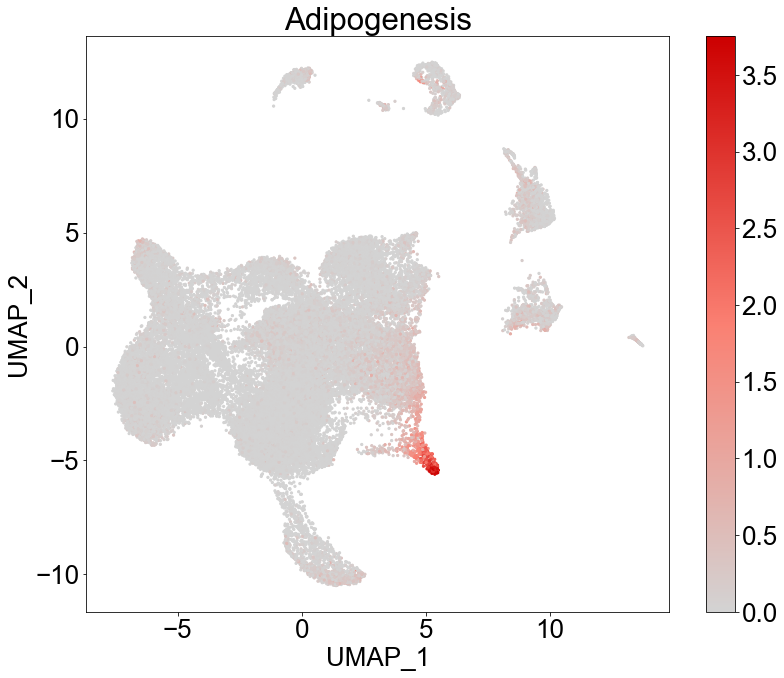

c:\users\csb_05\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\csb_05\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


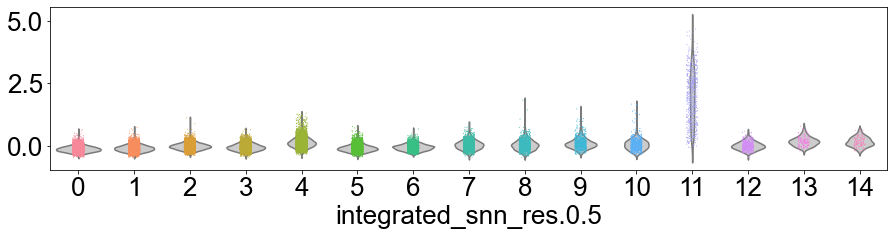

In [69]:
color_by = d_path_scores_2["HALLMARK_ADIPOGENESIS"]

plt.rcParams["font.size"] = 26
plt.rcParams["font.family"] = 'Arial'
plt.rcParams["figure.figsize"] = (12,10)

cvals  = [0,max(color_by)/2,max(color_by)]
colors = ["#D3D3D3","salmon","#cc0000"] # red #D93128
#colors = ["#D3D3D3","#7879FF","#0000FF"] # blue


norm=plt.Normalize(min(cvals),max(cvals))
tuples = list(zip(map(norm,cvals), colors))
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", tuples)

plt.scatter(df_concat["UMAP_1"],df_concat["UMAP_2"],c=color_by, cmap=cmap, norm=norm,s=5)
c = plt.colorbar()
plt.clim(0, np.percentile(color_by, 99.95))
plt.clim(0, np.percentile(color_by, 99.95))
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.xlabel("UMAP_1")
plt.ylabel("UMAP_2")
plt.title("Adipogenesis")
plt.tight_layout()

#plt.savefig("./new_plots/Melanogenesis.png",dpi=1000)
plt.show()
plt.close()

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(3)
#plt.axhline(y=1.5,color='black')
ax = sns.violinplot(df_concat["integrated_snn_res.0.5"],color_by,inner=None, color=".8")
sns.stripplot(df_concat["integrated_snn_res.0.5"],color_by,s = 1)
plt.show()
plt.close()

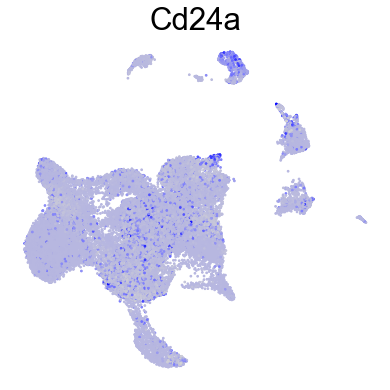

c:\users\csb_05\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\csb_05\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


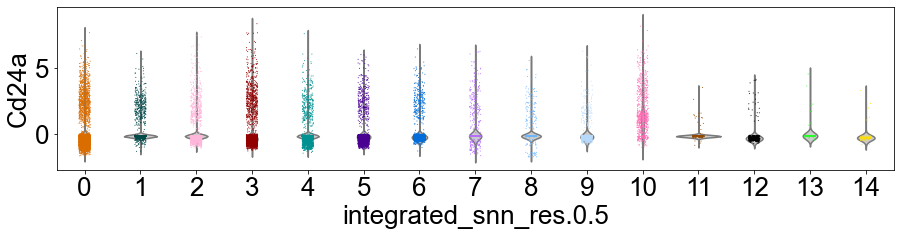

In [124]:
gene_of_int = "Cd24a"
color_by = df_concat[gene_of_int] # Ngfr, Mlana, Krt6a, Nrxn1, Mki67, Adipoq, Myod1, Acan
plt.rcParams["font.size"] = 26
plt.rcParams["font.family"] = 'Arial'
plt.rcParams["figure.figsize"] = (6,6)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
cvals  = [min(color_by),min(color_by) + (max(color_by)-min(color_by))/2,max(color_by)]
colors = ["#D3D3D3","salmon","#D93128"]
colors = ["#D3D3D3","#7879FF","#0000FF"] # blue


norm=plt.Normalize(min(cvals),max(cvals))
tuples = list(zip(map(norm,cvals), colors))
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", tuples)

plt.scatter(df_concat["UMAP_1"],df_concat["UMAP_2"],c=color_by, cmap=cmap, norm=norm,s=3)
#c = plt.colorbar()
#plt.clim(0, np.percentile(color_by, 99.95))
#plt.clim(0, np.percentile(color_by, 99.95))
#plt.xlabel("UMAP_1")
#plt.ylabel("UMAP_2")
plt.axis('off')
plt.legend('',frameon=False)
plt.title(gene_of_int)
plt.tight_layout()
#plt.xlim([-5,-3.5])
#plt.ylim([1.75,3.5])
plt.savefig("./new_plots/combined "+gene_of_int+" Expression.png",dpi=1000)
plt.show()
plt.close()

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(3)
#plt.axhline(y=1.5,color='black')
ax = sns.violinplot(df_concat["integrated_snn_res.0.5"],color_by,inner=None, color=".8")
sns.stripplot(df_concat["integrated_snn_res.0.5"],color_by,s = 1,palette=["#db6d00","#004949","#ffb6db","#920000","#009292","#490092","#006ddb","#b66dff","#6db6ff","#b6dbff","#ff6db6","#924900","#000000","#24ff24","#ffdf00"])
#plt.ylim([-4,6])
plt.show()
plt.close()